# Flight Price Prediction

## Problem Statement:

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

## Importing the required libraries:

In [1720]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import MinMaxScaler,power_transform,LabelEncoder,OrdinalEncoder,StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset:

In [1721]:
#since we checked that "Date_of_Journey","Dep_Time"and "Arrival_Time" are date columns, so loading them as date

train_dataset = pd.read_excel('flight_train.xlsx',parse_dates= ["Date_of_Journey","Dep_Time","Arrival_Time"])
test_dataset = pd.read_excel('flight_test.xlsx',parse_dates= ["Date_of_Journey","Dep_Time","Arrival_Time"])

In [1722]:
train_dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-05-26 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-05-26 05:50:00,2021-05-26 13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-05-26 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-05-26 18:05:00,2021-05-26 23:30:00,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-05-26 16:50:00,2021-05-26 21:35:00,4h 45m,1 stop,No info,13302


In [1723]:
test_dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,2021-05-26 17:30:00,2021-06-07 04:25:00,10h 55m,1 stop,No info
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU → MAA → BLR,2021-05-26 06:20:00,2021-05-26 10:20:00,4h,1 stop,No info
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL → BOM → COK,2021-05-26 19:15:00,2021-05-22 19:00:00,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL → BOM → COK,2021-05-26 08:00:00,2021-05-26 21:00:00,13h,1 stop,No info
4,Air Asia,2019-06-24,Banglore,Delhi,BLR → DEL,2021-05-26 23:55:00,2021-06-25 02:45:00,2h 50m,non-stop,No info


In [1724]:
train_dataset.shape

(10683, 11)

We have target variable in train dataset which is price

In [1725]:
test_dataset.shape

(2671, 10)

No target variable in test dataset

## Lets combine these datasets for data preprocessing

In [1726]:
#lets make temperory column called temp which will show train and test dataset in future.
train_dataset['Temp']="Train"
test_dataset['Temp']="Test"
df = pd.concat([train_dataset,test_dataset],ignore_index=True)
df

,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Temp,Total_Stops
0,No info,IndiGo,2021-03-22 01:10:00,2019-03-24,2021-05-26 22:20:00,New Delhi,2h 50m,3897.0,BLR → DEL,Banglore,Train,non-stop
1,No info,Air India,2021-05-26 13:15:00,2019-01-05,2021-05-26 05:50:00,Banglore,7h 25m,7662.0,CCU → IXR → BBI → BLR,Kolkata,Train,2 stops
2,No info,Jet Airways,2021-06-10 04:25:00,2019-09-06,2021-05-26 09:25:00,Cochin,19h,13882.0,DEL → LKO → BOM → COK,Delhi,Train,2 stops
3,No info,IndiGo,2021-05-26 23:30:00,2019-12-05,2021-05-26 18:05:00,Banglore,5h 25m,6218.0,CCU → NAG → BLR,Kolkata,Train,1 stop
4,No info,IndiGo,2021-05-26 21:35:00,2019-01-03,2021-05-26 16:50:00,New Delhi,4h 45m,13302.0,BLR → NAG → DEL,Banglore,Train,1 stop
...,...,...,...,...,...,...,...,...,...,...,...,...
13349,No info,Air India,2021-06-07 20:25:00,2019-06-06,2021-05-26 20:30:00,Banglore,23h 55m,NaN,CCU → DEL → BLR,Kolkata,Test,1 stop
13350,No info,IndiGo,2021-05-26 16:55:00,2019-03-27,2021-05-26 14:20:00,Banglore,2h 35m,NaN,CCU → BLR,Kolkata,Test,non-stop
13351,No info,Jet Airways,2021-03-07 04:25:00,2019-06-03,2021-05-26 21:50:00,Cochin,6h 35m,NaN,DEL → BOM → COK,Delhi,Test,1 stop
13352,No info,Air India,2021-05-26 19:15:00,2019-06-03,2021-05-26 04:00:00,Cochin,15h 15m,NaN,DEL → BOM → COK,Delhi,Test,1 stop


Now we have 13354 rows and 12 columns including temparory column, which will be removed later

We don't have target variable in the rows where Test is present in temparory column

## EDA (Exploratory Data Analysis)

In [1727]:
df.shape

(13354, 12)

Now we have 13354 rows and 12 columns

In [1728]:
df.columns

Index(['Additional_Info', 'Airline', 'Arrival_Time', 'Date_of_Journey',
       'Dep_Time', 'Destination', 'Duration', 'Price', 'Route', 'Source',
       'Temp', 'Total_Stops'],
      dtype='object')

Price the target columns, Temp is Temporary columns, Rest all columns are indepenedent columns

In [1729]:
df.dtypes

Additional_Info            object
Airline                    object
Arrival_Time       datetime64[ns]
Date_of_Journey    datetime64[ns]
Dep_Time           datetime64[ns]
Destination                object
Duration                   object
Price                     float64
Route                      object
Source                     object
Temp                       object
Total_Stops                object
dtype: object

Excepet our target variable (price), all the columns are object data type

In [1730]:
#lets check for null values
df.isnull().sum()

Additional_Info       0
Airline               0
Arrival_Time          0
Date_of_Journey       0
Dep_Time              0
Destination           0
Duration              0
Price              2671
Route                 1
Source                0
Temp                  0
Total_Stops           1
dtype: int64

we have 2671 null values in price column, which is not provided to us

We also have 1 null value in route and 1 null value in total stop column

In [1731]:
#lets print out the columns with unique values
for i in df.columns:
    if df[i].dtype == 'object':
        print(i,len(pd.unique(df[i])))

Additional_Info 10
Airline 12
Destination 6
Duration 374
Route 133
Source 5
Temp 2
Total_Stops 6


We can see the counr of unique values in all object coulmns

In [1732]:
#lets print out the columns with unique values
for i in df.columns:
    if df[i].dtype == 'object':
        print('\n')
        print(i,df[i].value_counts())



Additional_Info No info                         10493
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
2 Long layover                      1
1 Short layover                     1
Red-eye flight                      1
Name: Additional_Info, dtype: int64


Airline Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64


Destination Cochin    

## Data Preprocessing

### Handling the Null values in the dataset

In [1733]:
df.isnull().sum()

Additional_Info       0
Airline               0
Arrival_Time          0
Date_of_Journey       0
Dep_Time              0
Destination           0
Duration              0
Price              2671
Route                 1
Source                0
Temp                  0
Total_Stops           1
dtype: int64

In [1734]:
#Route column
df.Route.isnull().sum()

1

we have only one null value

In [1735]:
#lets check that out
df.loc[df.Route.isnull()]

,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Temp,Total_Stops
9039,No info,Air India,2021-05-07 09:25:00,2019-06-05,2021-05-26 09:45:00,Cochin,23h 40m,7480.0,NaN,Delhi,Train,NaN


lets replace this mode, since it is a object datatype

In [1736]:
#replace the nan value with mode
df['Route'] = df['Route'].fillna(df['Route'].mode()[0])

In [1737]:
#now there are no null values
df.Route.isnull().sum()

0

In [1738]:
#total stops column
df.Total_Stops.isnull().sum()

1

we have only one null value

In [1739]:
#lets check that out
df.loc[df.Total_Stops.isnull()]

,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Temp,Total_Stops
9039,No info,Air India,2021-05-07 09:25:00,2019-06-05,2021-05-26 09:45:00,Cochin,23h 40m,7480.0,DEL → BOM → COK,Delhi,Train,NaN


In [1740]:
#replacing the nan value with mode
df['Total_Stops'] = df['Total_Stops'].fillna(df['Total_Stops'].mode()[0])

In [1741]:
#lets check that out
df.loc[df.Total_Stops.isnull()]

,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Temp,Total_Stops


 Now there are no null values in this dataset

## Feature Enginerring

In [1742]:
#lets check out the duration column
df.Duration.head()

0    2h 50m
1    7h 25m
2       19h
3    5h 25m
4    4h 45m
Name: Duration, dtype: object

Duration column should have been in int or float format

lets remove h and m from that column, and get use full data

In [1743]:
#lets create a new column called duration and extract use full data in minutes
df['duration'] = (pd.to_timedelta(df['Duration']).dt.seconds // 60).astype(str).astype(float)

In [1744]:
#comparing both, Now duration is in minutes
df.loc[:,['Duration','duration']]

,Duration,duration
0,2h 50m,170.0
1,7h 25m,445.0
2,19h,1140.0
3,5h 25m,325.0
4,4h 45m,285.0
...,...,...
13349,23h 55m,1435.0
13350,2h 35m,155.0
13351,6h 35m,395.0
13352,15h 15m,915.0


In [1745]:
#checking for null values in new column
df.duration.isnull().sum()

0

In [1746]:
#lets drop old duration column, as we extraced usefull information
df.drop('Duration',axis = 1, inplace = True)

In [1747]:
df.head()

,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Dep_Time,Destination,Price,Route,Source,Temp,Total_Stops,duration
0,No info,IndiGo,2021-03-22 01:10:00,2019-03-24,2021-05-26 22:20:00,New Delhi,3897.0,BLR → DEL,Banglore,Train,non-stop,170.0
1,No info,Air India,2021-05-26 13:15:00,2019-01-05,2021-05-26 05:50:00,Banglore,7662.0,CCU → IXR → BBI → BLR,Kolkata,Train,2 stops,445.0
2,No info,Jet Airways,2021-06-10 04:25:00,2019-09-06,2021-05-26 09:25:00,Cochin,13882.0,DEL → LKO → BOM → COK,Delhi,Train,2 stops,1140.0
3,No info,IndiGo,2021-05-26 23:30:00,2019-12-05,2021-05-26 18:05:00,Banglore,6218.0,CCU → NAG → BLR,Kolkata,Train,1 stop,325.0
4,No info,IndiGo,2021-05-26 21:35:00,2019-01-03,2021-05-26 16:50:00,New Delhi,13302.0,BLR → NAG → DEL,Banglore,Train,1 stop,285.0


## Extarcting the usefull information Departure time  and Arrival time column

In [1748]:
#all the data provided is of year 2021, so no use in extracting year from this column
df.Dep_Time.dt.year.value_counts()

2021    13354
Name: Dep_Time, dtype: int64

In [1749]:
#all the data provided is of month MAY, so no use in extracting month from this column
df.Dep_Time.dt.month.value_counts()

5    13354
Name: Dep_Time, dtype: int64

In [1750]:
#all the data provided is of day Tuesday, so no use in extracting day from this column
df.Dep_Time.dt.day_name().value_counts()

Wednesday    13354
Name: Dep_Time, dtype: int64

In [1751]:
#lets extract hour the departue time column from 
df['Dep_hour'] = df['Dep_Time'].dt.hour

In [1752]:
#lets extract the time of the day from this column Dep_hour column
#lets write a function for this
def part_of_the_day(x):
    if (x > 4) and (x <= 8):
        return 'Early Morning'
    elif (x > 8) and (x <= 12 ):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return'Noon'
    elif (x > 16) and (x <= 20) :
        return 'Eve'
    elif (x > 20) and (x <= 24):
        return'Night'
    elif (x <= 4):
        return'Late Night'

In [1753]:
#applying the above fuction to get part of the day column
df['Dep_Part_of_the_day'] = df['Dep_hour'].apply(part_of_the_day)

In [1754]:
#comparing both the columns
df.loc[:,['Dep_Part_of_the_day','Dep_hour']]

,Dep_Part_of_the_day,Dep_hour
0,Night,22
1,Early Morning,5
2,Morning,9
3,Eve,18
4,Noon,16
...,...,...
13349,Eve,20
13350,Noon,14
13351,Night,21
13352,Late Night,4


In [1755]:
#lets drop the departue time column, as we extracted the usefull information
# and also dropping dep_hour which we created in the process of feature extraction
df.drop(['Dep_hour','Dep_Time'],axis = 1, inplace = True)

In [1756]:
df.head()

,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Destination,Price,Route,Source,Temp,Total_Stops,duration,Dep_Part_of_the_day
0,No info,IndiGo,2021-03-22 01:10:00,2019-03-24,New Delhi,3897.0,BLR → DEL,Banglore,Train,non-stop,170.0,Night
1,No info,Air India,2021-05-26 13:15:00,2019-01-05,Banglore,7662.0,CCU → IXR → BBI → BLR,Kolkata,Train,2 stops,445.0,Early Morning
2,No info,Jet Airways,2021-06-10 04:25:00,2019-09-06,Cochin,13882.0,DEL → LKO → BOM → COK,Delhi,Train,2 stops,1140.0,Morning
3,No info,IndiGo,2021-05-26 23:30:00,2019-12-05,Banglore,6218.0,CCU → NAG → BLR,Kolkata,Train,1 stop,325.0,Eve
4,No info,IndiGo,2021-05-26 21:35:00,2019-01-03,New Delhi,13302.0,BLR → NAG → DEL,Banglore,Train,1 stop,285.0,Noon


### Extracting part of the day from Arrival time column

In [1757]:
#lets extract the hour from the arrival time column
df['Arrival_hour'] = df['Arrival_Time'].dt.hour

In [1758]:
#applying the above fuction to get part of the day column
df['Arrival_Part_of_the_day'] = df['Arrival_hour'].apply(part_of_the_day)

In [1759]:
#comparing both the columns
df.loc[:,['Arrival_Part_of_the_day','Arrival_hour']]

,Arrival_Part_of_the_day,Arrival_hour
0,Late Night,1
1,Noon,13
2,Late Night,4
3,Night,23
4,Night,21
...,...,...
13349,Eve,20
13350,Noon,16
13351,Late Night,4
13352,Eve,19


In [1760]:
#lets drop the arrival time column, as we extracted the usefull information
# and also dropping arrival_hour which we created in the process of feature extraction
df.drop(['Arrival_hour','Arrival_Time'],axis = 1, inplace = True)

In [1761]:
df.head()

,Additional_Info,Airline,Date_of_Journey,Destination,Price,Route,Source,Temp,Total_Stops,duration,Dep_Part_of_the_day,Arrival_Part_of_the_day
0,No info,IndiGo,2019-03-24,New Delhi,3897.0,BLR → DEL,Banglore,Train,non-stop,170.0,Night,Late Night
1,No info,Air India,2019-01-05,Banglore,7662.0,CCU → IXR → BBI → BLR,Kolkata,Train,2 stops,445.0,Early Morning,Noon
2,No info,Jet Airways,2019-09-06,Cochin,13882.0,DEL → LKO → BOM → COK,Delhi,Train,2 stops,1140.0,Morning,Late Night
3,No info,IndiGo,2019-12-05,Banglore,6218.0,CCU → NAG → BLR,Kolkata,Train,1 stop,325.0,Eve,Night
4,No info,IndiGo,2019-01-03,New Delhi,13302.0,BLR → NAG → DEL,Banglore,Train,1 stop,285.0,Noon,Night


### We can drop date of the journey column, since it seems irrelevant because all the years are 2019

In [1762]:
#if the arrival and departure time is in year 2021 , how can the date of journey be in 2019
# so this is column is irrelevant for this dataset
#lets check
df.Date_of_Journey.dt.year

0        2019
1        2019
2        2019
3        2019
4        2019
         ... 
13349    2019
13350    2019
13351    2019
13352    2019
13353    2019
Name: Date_of_Journey, Length: 13354, dtype: int64

In [1763]:
#so lets drop this column
df.drop('Date_of_Journey',axis  =1, inplace = True)

In [1764]:
df.head()

,Additional_Info,Airline,Destination,Price,Route,Source,Temp,Total_Stops,duration,Dep_Part_of_the_day,Arrival_Part_of_the_day
0,No info,IndiGo,New Delhi,3897.0,BLR → DEL,Banglore,Train,non-stop,170.0,Night,Late Night
1,No info,Air India,Banglore,7662.0,CCU → IXR → BBI → BLR,Kolkata,Train,2 stops,445.0,Early Morning,Noon
2,No info,Jet Airways,Cochin,13882.0,DEL → LKO → BOM → COK,Delhi,Train,2 stops,1140.0,Morning,Late Night
3,No info,IndiGo,Banglore,6218.0,CCU → NAG → BLR,Kolkata,Train,1 stop,325.0,Eve,Night
4,No info,IndiGo,New Delhi,13302.0,BLR → NAG → DEL,Banglore,Train,1 stop,285.0,Noon,Night


## Replacing the Duplicate values

In [1765]:
#some columns are having duplicate values

df.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [1766]:
#additional info column is having 10493 no info values
# 77 % of the information is no info
#which is as good as nan values

# we have 2426 rows for In-flight meal not included 

#we have only 20 rows for 1 long layover,2 rows for 2 long layover,1 row for 1 short layover
df.Additional_Info.value_counts()

No info                         10493
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
2 Long layover                      1
1 Short layover                     1
Red-eye flight                      1
Name: Additional_Info, dtype: int64

In [1767]:
#we can replace some values in this columns
#no info and NO Info
#1 and 2 long layover with long layover

df["Additional_Info"].replace("1 Long layover","Long layover",inplace=True)
df["Additional_Info"].replace("2 Long layover","Long layover",inplace=True)
df["Additional_Info"].replace("No info","No Info",inplace=True)

In [1768]:
df.Additional_Info.value_counts()

No Info                         10496
In-flight meal not included      2426
No check-in baggage included      396
Long layover                       21
Change airports                     8
Business class                      5
1 Short layover                     1
Red-eye flight                      1
Name: Additional_Info, dtype: int64

In [1769]:
#lets check Destination column
df.Destination.value_counts()

Cochin       5682
Banglore     3581
Delhi        1582
New Delhi    1170
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64

In [1770]:
#we can replace new delhi with delhi
df["Destination"].replace("New Delhi","Delhi",inplace=True)

In [1771]:
#now there are no duplicate values in this column
df.Destination.value_counts()

Cochin       5682
Banglore     3581
Delhi        2752
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64

In [1772]:
#lets check Airline column
df.Airline.value_counts()

Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

In [1773]:
#we can replace jet airway busninesss with jet airways
#Vistara Premium economy with vistara
#Multiple carriers Premium economy with Multiple carriers 
#turjet with Jet ways since it has only row, replacing with mode
df["Airline"].replace("Jet Airways Business","Jet Airways",inplace=True)
df["Airline"].replace("Multiple carriers Premium economy","Multiple carriers",inplace=True)
df["Airline"].replace("Vistara Premium economy","Vistara",inplace=True)
df["Airline"].replace("Trujet","Jet Airways",inplace=True)

In [1774]:
#now there are no duplicate values
df.Airline.value_counts()

Jet Airways          4755
IndiGo               2564
Air India            2192
Multiple carriers    1559
SpiceJet             1026
Vistara               613
Air Asia              405
GoAir                 240
Name: Airline, dtype: int64

In [1775]:
#lets check route column
df.Route.value_counts()

DEL → BOM → COK                3001
BLR → DEL                      1941
CCU → BOM → BLR                1232
CCU → BLR                       896
BOM → HYD                       785
                               ... 
BOM → JDH → JAI → DEL → HYD       1
CCU → RPR → HYD → BLR             1
CCU → VTZ → BLR                   1
BOM → BBI → HYD                   1
BOM → COK → MAA → HYD             1
Name: Route, Length: 132, dtype: int64

In [1776]:
#we have 132 unique values in this column and it is a object column, so lets drop this column

df.drop('Route',axis = 1,inplace = True)

In [1777]:
#df.drop('Additional_Info',axis = 1,inplace = True)

In [1778]:
df.head()

,Additional_Info,Airline,Destination,Price,Source,Temp,Total_Stops,duration,Dep_Part_of_the_day,Arrival_Part_of_the_day
0,No Info,IndiGo,Delhi,3897.0,Banglore,Train,non-stop,170.0,Night,Late Night
1,No Info,Air India,Banglore,7662.0,Kolkata,Train,2 stops,445.0,Early Morning,Noon
2,No Info,Jet Airways,Cochin,13882.0,Delhi,Train,2 stops,1140.0,Morning,Late Night
3,No Info,IndiGo,Banglore,6218.0,Kolkata,Train,1 stop,325.0,Eve,Night
4,No Info,IndiGo,Delhi,13302.0,Banglore,Train,1 stop,285.0,Noon,Night


## Data Visualization :

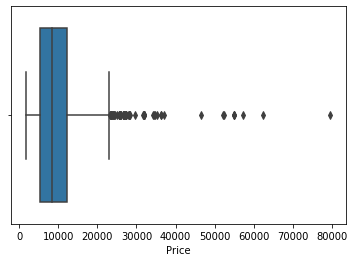

In [1779]:
#lets check the box plot of our target column, to check if there are outliers
sns.boxplot(df.Price)
plt.show()

From the above plot we can see there are many outliers in the target column

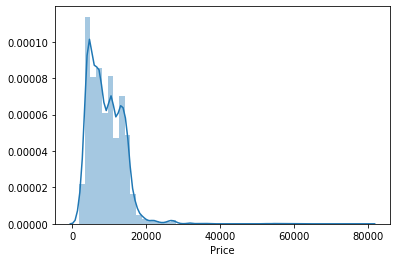

In [1780]:
#lets check the distribution of the target column
sns.distplot(df.Price[:10683])
plt.show()

From the above plot we can see that data is right skewed in target column

## Bivariate Analysis with Target Variable

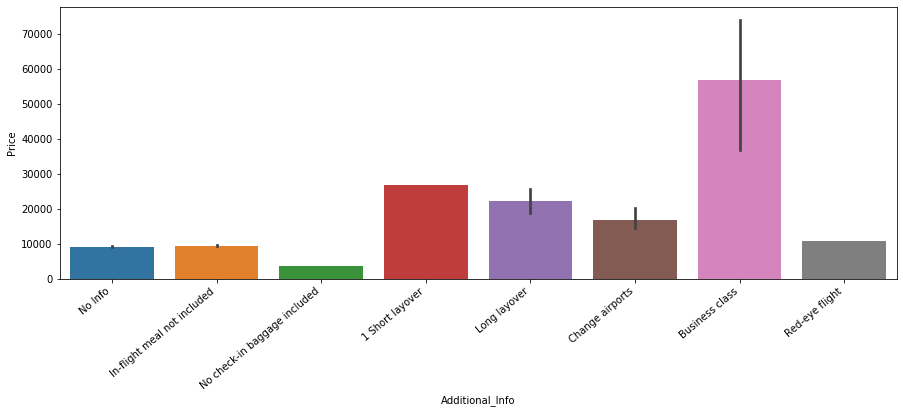

In [1781]:
#Lets check this column againt our target variable
plt.figure(figsize= (15,5))
col1 = sns.barplot(x = df['Additional_Info'] , y =df['Price'] )
col1.set_xticklabels(col1.get_xticklabels(), rotation=40, ha="right") 
plt.show()

From the above plot we can see that business call is having highest price among all

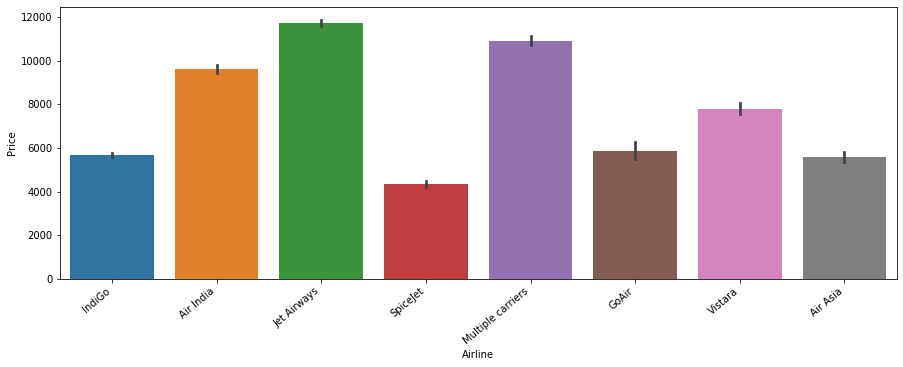

In [1782]:
#Lets check this column againt our target variable
plt.figure(figsize= (15,5))
col2 = sns.barplot(x = 'Airline' , y ='Price', data = df )
col2.set_xticklabels(col2.get_xticklabels(), rotation=40, ha="right") 
plt.show()

From the above plot we can see that jet Airways has the highest price compare to all Airlines

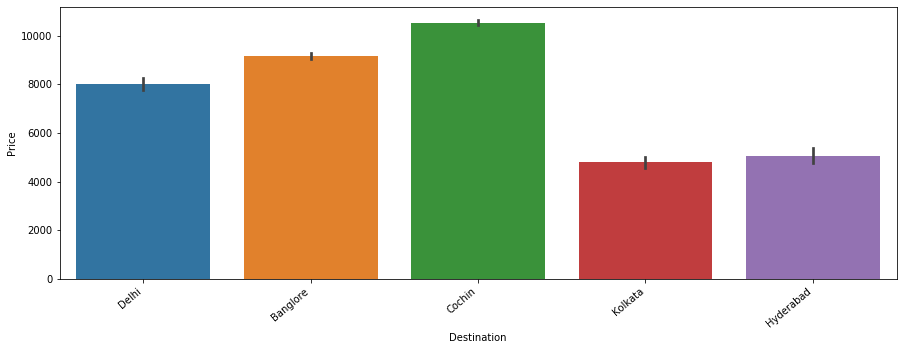

In [1783]:
#Lets check this column againt our target variable
plt.figure(figsize= (15,5))
col3 = sns.barplot(x = 'Destination' , y ='Price', data = df )
col3.set_xticklabels(col3.get_xticklabels(), rotation=40, ha="right") 
plt.show()

From the above plot we can see that people who travelled to Cohchin have paid more flight price compare to all

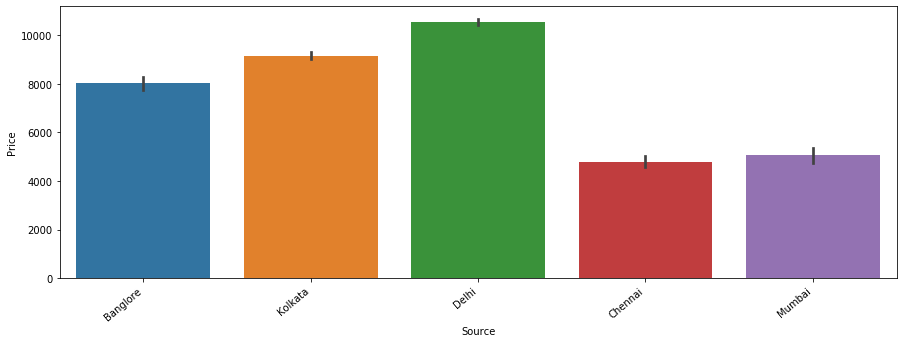

In [1784]:
#Lets check this column againt our target variable
plt.figure(figsize= (15,5))
col4 = sns.barplot(x = 'Source' , y ='Price', data = df )
col4.set_xticklabels(col4.get_xticklabels(), rotation=40, ha="right") 
plt.show()

From the above plot we can see that people who travelled from delhi have paid more than the others

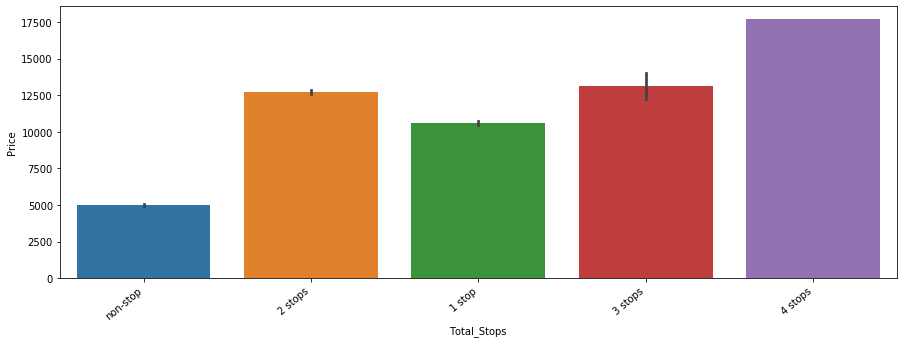

In [1785]:
#Lets check this column againt our target variable
plt.figure(figsize= (15,5))
col5 = sns.barplot(x = 'Total_Stops' , y ='Price', data = df )
col5.set_xticklabels(col5.get_xticklabels(), rotation=40, ha="right") 
plt.show()

From the above plot we can see that if the total stops is 4 , then the flight price is high

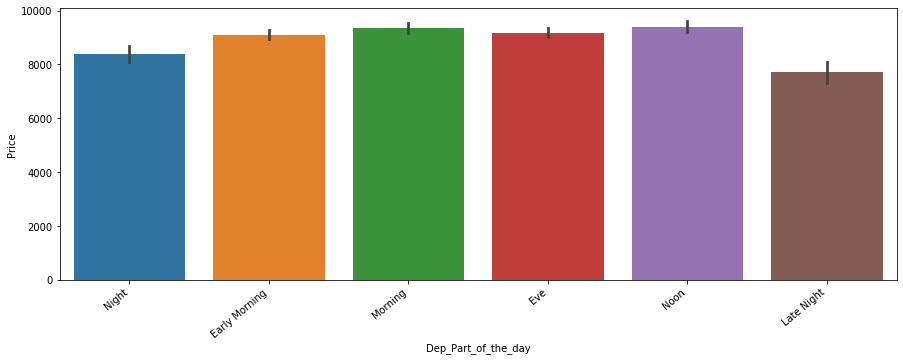

In [1786]:
#Lets check this column againt our target variable
plt.figure(figsize= (15,5))
col6 = sns.barplot(x = 'Dep_Part_of_the_day' , y ='Price', data = df )
col6.set_xticklabels(col6.get_xticklabels(), rotation=40, ha="right") 
plt.show()

From the above plot we can see that if departure time is Late night, then the flight price is less compare to others

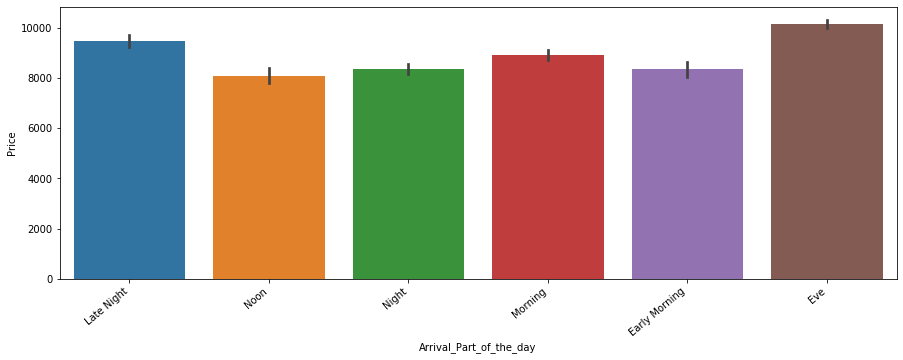

In [1787]:
#Lets check this column againt our target variable
plt.figure(figsize= (15,5))
col7 = sns.barplot(x = 'Arrival_Part_of_the_day' , y ='Price', data = df )
col7.set_xticklabels(col7.get_xticklabels(), rotation=40, ha="right") 
plt.show()

From the above plot we can see that if arrival time is Evening , then ticket price quite high

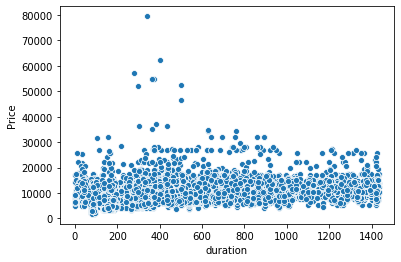

In [1788]:
#Lets check this column againt our target variable
sns.scatterplot(x = 'duration', y ='Price' , data  = df)
plt.show()

from the above plot we can see that duration and Price is moderate positive correlation with duration column

In [1789]:
#lest check the correlation between price and duration
df.corr()

,Price,duration
Price,1.000000,0.449471
duration,0.449471,1.000000


these are the only two numerical columns, correlation is 0.449

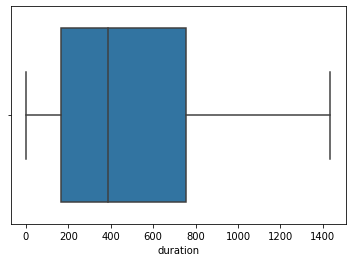

In [1790]:
#lets check for outliers in duration column
sns.boxplot(df.duration)
plt.show()

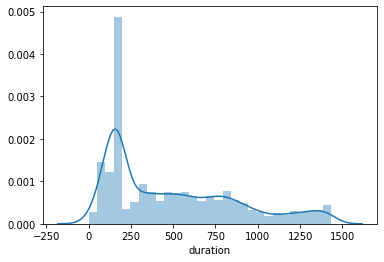

In [1791]:
#lets check for distribution 
sns.distplot(df.duration)
plt.show()

We can see that duration column is slightly right skewed

## Outlier Removal in target column

In [1792]:
#Function of outlier Removal when data is not normal distributed or Right skewed
def outliers_IQR3(data_frame,feature_name):
    IQR  =data_frame[feature_name].quantile(0.75)-data_frame[feature_name].quantile(0.25)
    lower_boundary = data_frame[feature_name].quantile(0.25) - (IQR * 1.5)
    upper_boundary = data_frame[feature_name].quantile(0.75) + (IQR * 1.5)
    df.loc[df[feature_name] >= upper_boundary,feature_name]= upper_boundary
    df.loc[df[feature_name] <= lower_boundary,feature_name]= lower_boundary

In [1793]:
#calling the function
outliers_IQR3(df,'Price')

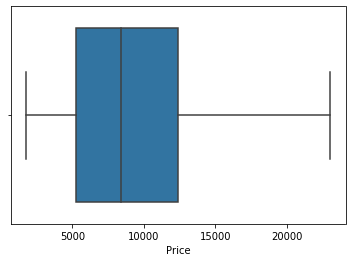

In [1794]:
#now lets outliers using box plot
sns.boxplot(df.Price)

In [1795]:
#outliers have been completely removed from this column

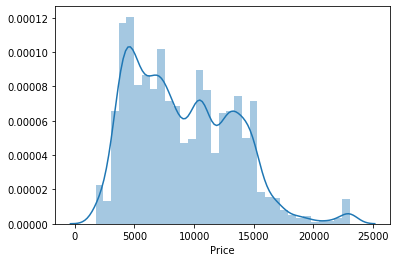

In [1796]:
#lets check the distribution of the target column
sns.distplot(df.Price[:10683])
plt.show()

In [1797]:
#now our target column is normal distributed

## Encoding the Object Columns

In [1798]:
df.columns

Index(['Additional_Info', 'Airline', 'Destination', 'Price', 'Source', 'Temp',
       'Total_Stops', 'duration', 'Dep_Part_of_the_day',
       'Arrival_Part_of_the_day'],
      dtype='object')

In [1799]:
#we need convert the above columns one-hot encoder, since they are not ordinal values
#and also columns contains more than 2 unique values
one_hot_columns = ['Additional_Info','Airline', 'Destination','Source','Total_Stops', 'Dep_Part_of_the_day',
       'Arrival_Part_of_the_day']
df_new = pd.get_dummies(data = df,columns=one_hot_columns)


In [1800]:
df_new.head()

,Price,Temp,duration,Additional_Info_1 Short layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_Long layover,Additional_Info_No Info,Additional_Info_No check-in baggage included,...,Dep_Part_of_the_day_Late Night,Dep_Part_of_the_day_Morning,Dep_Part_of_the_day_Night,Dep_Part_of_the_day_Noon,Arrival_Part_of_the_day_Early Morning,Arrival_Part_of_the_day_Eve,Arrival_Part_of_the_day_Late Night,Arrival_Part_of_the_day_Morning,Arrival_Part_of_the_day_Night,Arrival_Part_of_the_day_Noon
0,3897.0,Train,170.0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
1,7662.0,Train,445.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,13882.0,Train,1140.0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
3,6218.0,Train,325.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,13302.0,Train,285.0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0


## Scaling the Data

In [1801]:
#lets split our x and y column before scaling
#x and y spitting
Y = df_new['Price']
X = df_new.drop('Price',axis = 1)

In [1802]:
#dropping temp column
temp = X['Temp']

X.drop('Temp',axis =1 ,inplace = True)

In [1803]:
X.shape

(13354, 44)

In [1804]:
#Lets scale the data using standard scaler
scaler = StandardScaler()
scaled_X = pd.DataFrame(scaler.fit_transform(X),columns= X.columns)
scaled_X.head()

,duration,Additional_Info_1 Short layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_Long layover,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_Red-eye flight,Airline_Air Asia,...,Dep_Part_of_the_day_Late Night,Dep_Part_of_the_day_Morning,Dep_Part_of_the_day_Night,Dep_Part_of_the_day_Noon,Arrival_Part_of_the_day_Early Morning,Arrival_Part_of_the_day_Eve,Arrival_Part_of_the_day_Late Night,Arrival_Part_of_the_day_Morning,Arrival_Part_of_the_day_Night,Arrival_Part_of_the_day_Noon
0,-0.845671,-0.008654,-0.019354,-0.024483,-0.471167,-0.039687,0.521818,-0.174815,-0.008654,-0.176852,...,-0.211543,-0.512164,3.045046,-0.443269,-0.324329,-0.58767,2.212647,-0.496862,-0.461289,-0.342631
1,-0.126558,-0.008654,-0.019354,-0.024483,-0.471167,-0.039687,0.521818,-0.174815,-0.008654,-0.176852,...,-0.211543,-0.512164,-0.328402,-0.443269,-0.324329,-0.58767,-0.451947,-0.496862,-0.461289,2.918591
2,1.690836,-0.008654,-0.019354,-0.024483,-0.471167,-0.039687,0.521818,-0.174815,-0.008654,-0.176852,...,-0.211543,1.952499,-0.328402,-0.443269,-0.324329,-0.58767,2.212647,-0.496862,-0.461289,-0.342631
3,-0.440353,-0.008654,-0.019354,-0.024483,-0.471167,-0.039687,0.521818,-0.174815,-0.008654,-0.176852,...,-0.211543,-0.512164,-0.328402,-0.443269,-0.324329,-0.58767,-0.451947,-0.496862,2.167840,-0.342631
4,-0.544951,-0.008654,-0.019354,-0.024483,-0.471167,-0.039687,0.521818,-0.174815,-0.008654,-0.176852,...,-0.211543,-0.512164,-0.328402,2.255964,-0.324329,-0.58767,-0.451947,-0.496862,2.167840,-0.342631


In [1805]:
#now our data is scaled using standard scaler

## PCA (Principal Component Analysis):

In [1806]:
#we need to use pca becuase we have 44 columns in this dataset which is very high

In [1807]:
#we should always use scaled data for performing the PCA

In [1808]:
#we have 44 columns excluding target variable
scaled_X.shape

(13354, 44)

In [1809]:
#first lets TEST out percentage of data that we will obtain after PCA
testpca = PCA()
test_x = testpca.fit(scaled_X)

In [1810]:
#now lets out cumulative score 
cum_score = np.cumsum(test_x.explained_variance_ratio_)*100
cum_score  

array([ 10.7117993 ,  18.15886892,  24.03623587,  29.56073261,
        34.63159481,  39.12080874,  42.94841188,  46.64298051,
        50.02555727,  53.30177068,  56.39276693,  59.26896011,
        61.97592109,  64.60212689,  67.0739823 ,  69.50234923,
        71.88287406,  74.20056407,  76.48058811,  78.75180861,
        80.98081432,  83.17058835,  85.26406762,  87.3254192 ,
        89.18714054,  90.95619108,  92.70028582,  94.38730083,
        95.92947141,  97.21192205,  98.37363188,  99.26084613,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ])

In [1811]:
#lets check how many columns gives 95% of variance
s = np.argmax(cum_score > 95)
print("Number of components expaining 95% of variance is :", s)

Number of components expaining 95% of variance is : 28


In [1812]:
#lets check how many columns gives 90% of variance
s = np.argmax(cum_score > 90)
print("Number of components expaining 90% of variance is :", s)

Number of components expaining 90% of variance is : 25


In [1813]:
#now we have seen that how much data will be lost based number of columns

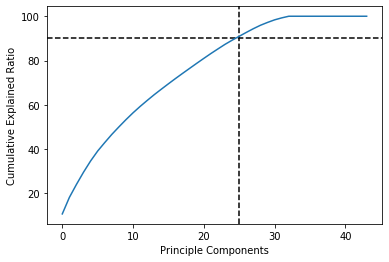

In [1814]:
#lets plot the graph for graphical understanding
plt.ylabel('Cumulative Explained Ratio')
plt.xlabel('Principle Components')

plt.axvline(x = s, color = 'k', linestyle = '--')
plt.axhline(y = 90, color = 'k', linestyle = '--')

plt.plot(cum_score)
plt.show()

From the above plot we can see that for 25 columns 90% of data will be retrived

In [1815]:
#lets perform the PCA with 24 columns
Final_pca = PCA(n_components= 25)

pca_x = pd.DataFrame(Final_pca.fit_transform(scaled_X))

In [1816]:
#lets create a datafram
pca_x.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,3.069837,-1.393198,1.989551,-1.027884,-0.115813,-1.454992,3.471313,0.332219,-0.582275,0.351281,...,-0.750895,-1.026260,-0.571641,-0.041381,0.124925,-0.062239,0.471740,-0.969975,0.174560,0.100738
1,0.447317,1.065369,-2.181283,-1.749724,-0.757693,3.034931,-0.202669,0.215214,-1.116334,1.119299,...,0.860634,-1.415886,0.304538,0.398646,0.051800,-0.250602,1.305132,0.691473,-1.437770,-0.413398
2,-2.436083,-1.041157,0.330790,0.571886,-0.280840,1.709190,2.477729,-0.269853,0.138106,0.756604,...,0.192208,-0.281430,0.286246,0.197440,0.032935,-0.302335,0.267366,0.210657,-0.066861,-0.695223
3,0.485189,1.824681,-2.032580,-1.853207,-0.417684,-2.284780,-0.014436,-0.786495,0.136329,-1.397291,...,-0.128620,-0.400155,-0.149176,0.035622,-0.195327,0.540371,0.582740,-0.862485,-0.206169,-0.010995
4,1.463272,-0.756799,1.299027,-2.215330,0.036219,-2.049055,-0.386730,-0.775577,0.145758,0.634452,...,-1.628970,1.101529,-0.352486,0.021549,-0.284418,-0.177782,0.389382,-0.319553,0.963801,0.363737


In [1817]:
print("variance is : {}".format(np.sum(Final_pca.explained_variance_ratio_)))

variance is : 0.8918714053997423


In [1818]:
pca_x.shape

(13354, 25)

Now we have 13354 rows and 24 columnm

## Let split our data

In [1819]:
#lets first add temp column splitting
pca_x['Temp'] = temp

In [1820]:
pca_x.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,Temp
0,3.069837,-1.393198,1.989551,-1.027884,-0.115813,-1.454992,3.471313,0.332219,-0.582275,0.351281,...,-1.026260,-0.571641,-0.041381,0.124925,-0.062239,0.471740,-0.969975,0.174560,0.100738,Train
1,0.447317,1.065369,-2.181283,-1.749724,-0.757693,3.034931,-0.202669,0.215214,-1.116334,1.119299,...,-1.415886,0.304538,0.398646,0.051800,-0.250602,1.305132,0.691473,-1.437770,-0.413398,Train
2,-2.436083,-1.041157,0.330790,0.571886,-0.280840,1.709190,2.477729,-0.269853,0.138106,0.756604,...,-0.281430,0.286246,0.197440,0.032935,-0.302335,0.267366,0.210657,-0.066861,-0.695223,Train
3,0.485189,1.824681,-2.032580,-1.853207,-0.417684,-2.284780,-0.014436,-0.786495,0.136329,-1.397291,...,-0.400155,-0.149176,0.035622,-0.195327,0.540371,0.582740,-0.862485,-0.206169,-0.010995,Train
4,1.463272,-0.756799,1.299027,-2.215330,0.036219,-2.049055,-0.386730,-0.775577,0.145758,0.634452,...,1.101529,-0.352486,0.021549,-0.284418,-0.177782,0.389382,-0.319553,0.963801,0.363737,Train


In [1821]:
#Lets get out Original Train and Test Dataset provided in the project
X_train_original = pca_x.loc[pca_x["Temp"] == "Train"]
X_test_original = pca_x.loc[pca_x["Temp"]=="Test"]
#X_train_original.reset_index(drop =True, inplace=True)
#X_test_original.reset_index(drop = True, inplace=True)

In [1822]:
#lets drop the null values in the Y column
Y.dropna(inplace=True)
Y.shape

(10683,)

In [1823]:
#Original X_train dataset
X_train_original.shape

(10683, 26)

In [1824]:
#Original X_test dataset
X_test_original.shape

(2671, 26)

In [1825]:
#no null values in this series
Y.isnull().sum()

0

In [1826]:
# Original X train column from 0th row to 8422th row
X_train_original.drop('Temp',axis = 1,inplace  =True)

In [1827]:
# Original X test column from 8523rd row to 14203rd row
X_test_original.drop('Temp',axis = 1,inplace  =True)

In [1828]:
#lets Ignore thos index now
X_train_original.reset_index(drop =True, inplace=True)
X_test_original.reset_index(drop = True, inplace=True)

## We have provided with X_test data, but Y_test (Label) is not provided

So lets use our X_train_original and Y_train_Original  as X and Y for model selection

## Best random state

In [1829]:
max_r2score = 0
rand_state = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X_train_original,Y,test_size=.22,random_state= i )
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    r2 = r2_score(y_test,pred)
    if r2 > max_r2score:
        max_r2score = r2
        rand_state = i
print('Best r2 score is {} on random state {}'.format(max_r2score,rand_state)) 

Best r2 score is 0.5486174436736408 on random state 19


In [1830]:
print('We got our best randoms sate as :',rand_state)

We got our best randoms sate as : 19


In [1831]:
#Lets split for train and test data
x_train,x_test,y_train,y_test = train_test_split(X_train_original,Y,test_size=.22,random_state= rand_state )

In [1832]:
lrg = LinearRegression()
lrg.fit(x_train,y_train)
pr =lrg.predict(x_test)
print("r2_score of linear refression is :", r2_score(y_test,pr))
print('Error :')
print('mean absolute error :',mean_absolute_error(y_test,pred))
print('mean squared error : ', mean_squared_error(y_test,pred))
print('root mean squared error :',np.sqrt(mean_squared_error(y_test,pred)))

r2_score of linear refression is : 0.5486174436736408
Error :
mean absolute error : 5687.997954683365
mean squared error :  4954204594.515974
root mean squared error : 70386.11080686284


R2 score is very less for linear regression, lets check out for other models

## Model selection :

In [1833]:
#lets Choose r2 score of below four Models
dtc = DecisionTreeRegressor()
knn = KNeighborsRegressor(n_neighbors=5)
rf = RandomForestRegressor()
ada = AdaBoostRegressor()

In [1834]:
#checking each model with Cross val score
model_list = [dtc,knn,rf,ada]
least_difference = []
for m in model_list:
    m.fit(x_train,y_train)
    pred = m.predict(x_test)
    cvs = cross_val_score(m,X_train_original,Y,cv =5)
    print('\n')
    print(m)
    print('Scores :')
    print('r2 score:',r2_score(y_test,pred))
    print('Cross Val score :',cvs.mean())
    print('Error :')
    print('mean absolute error :',mean_absolute_error(y_test,pred))
    print('mean squared error : ', mean_squared_error(y_test,pred))
    print('root mean squared error :',np.sqrt(mean_squared_error(y_test,pred)))
    print('Difference :')
    difference = np.abs(r2_score(y_test,pred) - cvs.mean())
    print('Diffrence between cross val score and root mean squared error is : {0:.2f}'.format(difference))
    least_difference.append((m,'Diffrence between cross val score and root mean squared error is : {0:.2f}'.format(difference)))



DecisionTreeRegressor()
Scores :
r2 score: 0.7291693877525909
Cross Val score : 0.7265254068576247
Error :
mean absolute error : 1315.8374027173038
mean squared error :  4928823.330834382
root mean squared error : 2220.095342735168
Difference :
Diffrence between cross val score and root mean squared error is : 0.00


KNeighborsRegressor()
Scores :
r2 score: 0.7799559180247838
Cross Val score : 0.745815869830896
Error :
mean absolute error : 1253.9602722245854
mean squared error :  4004563.5759251383
root mean squared error : 2001.1405687570123
Difference :
Diffrence between cross val score and root mean squared error is : 0.03


RandomForestRegressor()
Scores :
r2 score: 0.7634453392956431
Cross Val score : 0.7617337649259543
Error :
mean absolute error : 1272.3541758367599
mean squared error :  4305038.197204015
root mean squared error : 2074.8585969178757
Difference :
Diffrence between cross val score and root mean squared error is : 0.00


AdaBoostRegressor()
Scores :
r2 score: 0.

In [1835]:
#lets check the least difference between r2 score and cross val score
least_difference

[(DecisionTreeRegressor(),
  'Diffrence between cross val score and root mean squared error is : 0.00'),
 (KNeighborsRegressor(),
  'Diffrence between cross val score and root mean squared error is : 0.03'),
 (RandomForestRegressor(),
  'Diffrence between cross val score and root mean squared error is : 0.00'),
 (AdaBoostRegressor(),
  'Diffrence between cross val score and root mean squared error is : 0.01')]

In [1836]:
#We see that for Random forest no diffrence between cross val score and r2 score
#so lets choose random as our final model
#there is no overfitting in this model

In [1837]:
#we can see that there no differnec between cross val score and R2 score for random forest
least_difference[2]

(RandomForestRegressor(),
 'Diffrence between cross val score and root mean squared error is : 0.00')

## Hyperparameter Tuning:

In [1838]:
#Random forest and KNN are giving high r2 score, but random forest is having no overfitting

### 1. Random forest regressor - hyperparameter tuning

In [1839]:
#lets use random forest regressor
parameters = {'n_estimators' : [100,200,300],'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
gsvrf = RandomizedSearchCV(rf, parameters, cv=5,scoring="r2")
gsvrf.fit(x_train,y_train)
print(gsvrf.best_score_)
print(gsvrf.best_params_)

0.7535509497074655
{'n_estimators': 300, 'max_features': 'log2', 'criterion': 'mae'}


we got best paramters for random forest using hyperparameter tuning

In [ ]:
2+2

In [1840]:

best_params_rf = {'n_estimators': 300,
'max_features' : 'log2',
 'criterion': 'mae'}

In [1842]:
#lets create Random forest model using these parameters
print('Random Forest regressor')
hyper_p_rf = RandomForestRegressor(n_estimators= 300,criterion= 'mae',max_features = 'log2')
hyper_p_rf.fit(x_train,y_train)
hyper_p_pred_rf = hyper_p_rf.predict(x_test)
cvs = cross_val_score(hyper_p_rf,X_train_original,Y,cv =5)
print('\n')
print('Scores :')
print('r2 score:',r2_score(y_test,hyper_p_pred_rf))
print('Cross Val score :',cvs.mean())
print('Error :')
print('mean absolute error :',mean_absolute_error(y_test,hyper_p_pred_rf))
print('mean squared error : ', mean_squared_error(y_test,hyper_p_pred_rf))
print('root mean squared error :',np.sqrt(mean_squared_error(y_test,hyper_p_pred_rf)))
print('Difference :')
difference = np.abs(r2_score(y_test,hyper_p_pred_rf) - cvs.mean())
print('Diffrence between cross val score and root mean squared error is : {0:.2f}'.format(difference))
least_difference.append((hyper_p_rf,'Diffrence between cross val score and root mean squared error is : {0:.2f}'.format(difference)))

Random Forest regressor


Scores :
r2 score: 0.7623017079609482
Cross Val score : 0.7628606797642462
Error :
mean absolute error : 1207.6935226144903
mean squared error :  4325851.046820765
root mean squared error : 2079.868035914963
Difference :
Diffrence between cross val score and root mean squared error is : 0.00


### 2. KNN regressor - Hyperparameter tuning

In [1843]:
#lets create the parameter list to pass in Randomised seracgh cv
parameters = {'n_neighbors':list(range(5,16,2)),'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],'leaf_size':list(range(25,35))}
#using randomised search CV
gsvkn = RandomizedSearchCV(estimator= knn , param_distributions= parameters,cv =5)
gsvkn.fit(x_train,y_train) 
print(gsvkn.best_score_)
print(gsvkn.best_params_)

0.730994859123942
{'weights': 'uniform', 'n_neighbors': 5, 'leaf_size': 28, 'algorithm': 'ball_tree'}


In [1844]:
best_parametrers_knn = {'weights': 'uniform', 'n_neighbors': 5, 'leaf_size': 28, 'algorithm': 'ball_tree'}

In [1845]:
#we got our best parameters for knn using the randomized serach cv

In [1846]:
#lets create knn model using these parameters
print('KNeighborsRegressor')
hyper_p_knn = KNeighborsRegressor(n_neighbors= 5 ,weights= 'uniform', leaf_size= 26, algorithm= 'ball_tree')
hyper_p_knn.fit(x_train,y_train)
hyper_p_pred = hyper_p_knn.predict(x_test)
cvs = cross_val_score(hyper_p_knn,X_train_original,Y,cv =5)
print('\n')
print('Scores :')
print('r2 score:',r2_score(y_test,hyper_p_pred))
print('Cross Val score :',cvs.mean())
print('Error :')
print('mean absolute error :',mean_absolute_error(y_test,hyper_p_pred))
print('mean squared error : ', mean_squared_error(y_test,hyper_p_pred))
print('root mean squared error :',np.sqrt(mean_squared_error(y_test,hyper_p_pred)))
print('Difference :')
difference = np.abs(r2_score(y_test,hyper_p_pred) - cvs.mean())
print('Diffrence between cross val score and root mean squared error is : {0:.2f}'.format(difference))
least_difference.append((hyper_p_knn,'Diffrence between cross val score and root mean squared error is : {0:.2f}'.format(difference)))

KNeighborsRegressor


Scores :
r2 score: 0.7646422432645984
Cross Val score : 0.7447792283235755
Error :
mean absolute error : 1296.5822203317737
mean squared error :  4283255.843436834
root mean squared error : 2069.602822629703
Difference :
Diffrence between cross val score and root mean squared error is : 0.02


In [1847]:
#lets choose random forest as our model since it having highest r2 score
#and also 0 diffrence between r2 score and cross val score

## Creating a Final Model as Random Forest Regressor

In [1848]:
final_model_rf = RandomForestRegressor(n_estimators= 300,criterion= 'mae',max_features = 'log2')
final_model_rf.fit(x_train,y_train)
final_pred = final_model_rf.predict(x_test)
cvs = cross_val_score(final_model_rf,X_train_original,Y,cv =5)
print('\n')
print('Scores :')
print('r2 score:',r2_score(y_test,final_pred))
print('Cross Val score :',cvs.mean())
print('Error :')
print('mean absolute error :',mean_absolute_error(y_test,final_pred))
print('mean squared error : ', mean_squared_error(y_test,final_pred))
print('root mean squared error :',np.sqrt(mean_squared_error(y_test,final_pred)))
print('Difference :')
difference = np.abs(r2_score(y_test,final_pred) - cvs.mean())
print('Diffrence between cross val score and root mean squared error is : {0:.2f}'.format(difference))
least_difference.append((m,'Diffrence between cross val score and root mean squared error is : {0:.2f}'.format(difference)))



Scores :
r2 score: 0.7650590405074131
Cross Val score : 0.7634881108113294
Error :
mean absolute error : 1202.3812710903162
mean squared error :  4275670.585782372
root mean squared error : 2067.7694711409135
Difference :
Diffrence between cross val score and root mean squared error is : 0.00


In [1849]:
#now our r2 score got incresed 76.66% after hyperparameter tuning
#diffrence between cross val score and r2 score is also 0.00
#which means no overfitting

## Saving the model:

In [1850]:
#serialization using joblib
import joblib
joblib.dump(final_model_rf,'Flight_Price.obj')

['Flight_Price.obj']

In [1851]:
Flight_Price = joblib.load('Flight_Price.obj')

In [1852]:
s_pred = Flight_Price.predict(x_test)

In [1853]:
r2_score(y_test,s_pred)

0.7650590405074131

our r2_score is 76.45% percent

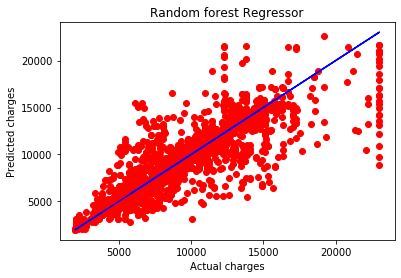

In [1854]:
#lets plot y_test vs predicted 

plt.figure(figsize=(6,4))
plt.scatter(x = y_test,y = s_pred,color = 'r')
plt.plot(y_test,y_test,color = 'b')
plt.xlabel('Actual charges')
plt.ylabel('Predicted charges')
plt.title('Random forest Regressor')
plt.show()

we can see that values are very close to the line

## predicted x_test

In [1855]:
#lets make a dataframe of actual answers vs predicted answers
conclusion = pd.DataFrame((Flight_Price.predict(x_test)[:],y_test[:]),index= ['Predicted','Actual'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,2341,2342,2343,2344,2345,2346,2347,2348,2349,2350
Predicted,3886.276667,3101.576667,13586.498333,8583.521667,8993.185,10534.698333,4092.766667,6597.336667,5507.128333,11718.4,...,5061.84,9562.141667,14726.683333,7255.233333,9786.55,14971.916667,14933.988333,10790.438333,9371.613333,5644.996667
Actual,3919.000000,3100.000000,11467.000000,9134.000000,8452.000,10262.000000,6297.000000,7580.000000,5510.000000,11432.0,...,4668.00,8586.000000,14781.000000,7229.000000,10112.00,13817.000000,14714.000000,10844.000000,9663.000000,5796.000000


77% of Our answers are correct, and the model is also not overfitted

# Final Prediction : conclusion

In [1856]:
#lets predict the X_test_origanl, we don't have y_test_original values to compare

In [1857]:
final_y_predicted = Flight_Price.predict(X_test_original)

In [1858]:
final_y_predicted.shape

(2671,)

In [1859]:
#lets create a dataframe of our final prediction
FINAL_Y_PREDICTED  = pd.DataFrame(final_y_predicted,columns = ['FINAL_Y_PREDICTED'])
FINAL_Y_PREDICTED

,FINAL_Y_PREDICTED
0,13933.955000
1,4226.000000
2,10523.096667
3,13033.456667
4,4288.720000
...,...
2666,10234.965000
2667,5264.385000
2668,15421.065000
2669,10363.166667


In [1860]:
#exporting to excel sheet
FINAL_Y_PREDICTED.to_excel('FINAL_Y_PREDICTED.xlsx')

we have random forest model with 77% r2_score and no overfitting in the model